# Advertising Dataset
## Simple Linear regression
## 1. Load the given dataset and explore its columns.

In [14]:
import pandas as pd

df = pd.read_csv("Advertising.csv")
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [15]:
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


## 2. Use TV advertising spend as the input feature and Sales as the target variable

In [17]:
X = df[['TV']]      
y = df['Sales']     

## 3. Build a model that can learn the relationship between TV spend and Sales

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## 4. Train the model using historical data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

LinearRegression()

## 5. Predict sales for unseen data points

In [20]:
y_pred = model.predict(X_test)
print(y_pred[:5])   

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098]


## 6. Predict sales when TV advertising spend is 150 units

In [21]:
import numpy as np

tv_spend = np.array([[150]])
predicted_sales = model.predict(tv_spend)

print("Predicted Sales for TV Spend = 150:", predicted_sales[0])

Predicted Sales for TV Spend = 150: 15.329550017961328


c:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 7. Measure how accurate your predictions are

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 1.9502948931650088
Root Mean Squared Error: 2.470035001123256
R² Score: 0.802561303423698


## 8. Visualize

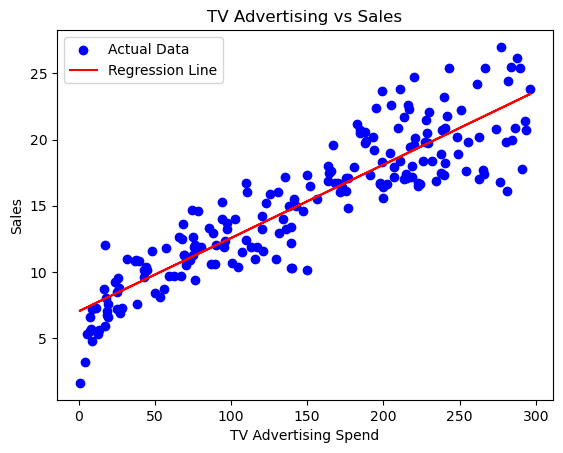

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("TV Advertising vs Sales")
plt.legend()
plt.show()

## 9. Interpret the result in simple business terms

## Business Interpretation:
### 1. Sales increase as TV advertising spend increases.
### 2. The positive slope confirms a strong relationship.
### 3. Prediction error is acceptable for marketing decisions.

## 10. Suggest one improvement to make the prediction better

## Improvement:
### Use Multiple Linear Regression by including Radio and Newspaper advertising
### to improve prediction accuracy.


## Multiple Linear regression

## 2. Use TV, Radio, and Newspaper advertising spends as input features

In [24]:
X = df[['TV', 'Radio', 'Newspaper']]  
y = df['Sales']                       

## 3. Build a model that learns the relationship between advertising spends and sales

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## 4. Train the model using historical data

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)


LinearRegression()

## 5. Predict sales for unseen data points

In [28]:
y_pred = model.predict(X_test)

print("First 5 Predictions:", y_pred[:5])


First 5 Predictions: [17.0347724  20.40974033 23.72398873  9.27278518 21.68271879]


## 6. Predict sales for given advertising budget : TV = 150, Radio = 20, Newspaper = 30

In [29]:
import numpy as np

new_budget = np.array([[150, 20, 30]])
predicted_sales = model.predict(new_budget)

print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 15.039523680317233


c:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 7. Evaluate the model’s prediction error

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.274826210954934
Root Mean Squared Error (RMSE): 1.7052146229349228
R² Score: 0.9059011844150826


## 8. Interpret the coefficients of the model

### Medium with strongest impact: Highest coefficient value
### Medium with least impact: Lowest coefficient value

In [31]:
coefficients = pd.DataFrame({
    "Advertising Medium": X.columns,
    "Coefficient": model.coef_
})

print(coefficients)


  Advertising Medium  Coefficient
0                 TV     0.054509
1              Radio     0.100945
2          Newspaper     0.004337


## 9. Visualize actual sales vs predicted sales

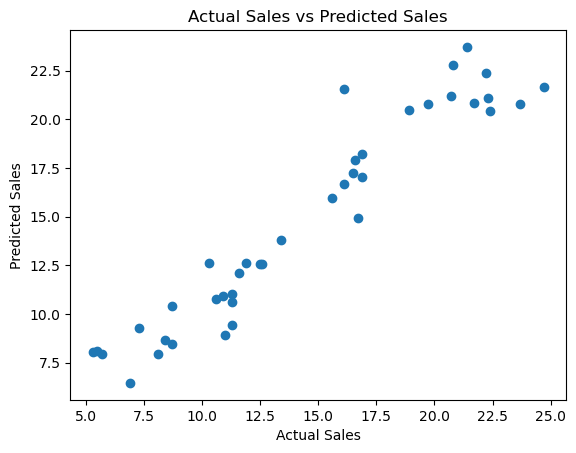

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.show()


## 10. Business Recommendation

### Increase investment in TV and Radio advertising,
### as they have the strongest influence on sales.


## 11. Technical Improvement:

### Use advanced models like Polynomial Regression or
### add more data to improve prediction accuracy.
